### True Positive Rate

TPR or True Positive Rate, is the same as recall.

**TPR = TP / (TP + FN)**

Even though it is same as recall, we will make a python function for it for further
use with this name.

In [1]:
def tpr(y_true, y_pred):
    """
    Function to calculate tpr
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: tpr/recall
    """
    return recall(y_true, y_pred)

TPR or recall is also known as **sensitivity**.

### False Positive Rate

**FPR = FP / (TN + FP)**

In [2]:
def fpr(y_true, y_pred):
    """
    Function to calculate fpr
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: fpr
    """
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    return fp / (tn + fp)

And **1 - FPR** is known as **specificity** or **True Negative Rate** or **TNR**.

These are a lot of terms, but the most important ones out of these are only TPR and
FPR.

For a typical threshold of >= 0.5, we can evaluate all the above values of precision,
recall/TPR, F1 and FPR. But we can do the same if we choose the value of the
threshold to be 0.4 or 0.6. In fact, we can choose any value between 0 and 1 and
calculate all the metrics described above.

Let’s calculate only two values, though: TPR and FPR.

In [5]:
def recall(y_true, y_pred):
    """
    Function to calculate recall
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: recall score
    """
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp / (tp + fn)
    return recall

In [6]:
def precision(y_true, y_pred):
    """
    Function to calculate precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: precision score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp / (tp + fp)
    return precision

In [8]:
def true_positive(y_true, y_pred):
    """
    Function to calculate True Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true positives
    """
    # initialize
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp
def true_negative(y_true, y_pred):
    """
    Function to calculate True Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true negatives
    """
    # initialize
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn
def false_positive(y_true, y_pred):
    """
    Function to calculate False Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false positives
    """
    # initialize
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp
def false_negative(y_true, y_pred):
    """
    Function to calculate False Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false negatives
    """
    # initialize
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

In [9]:
# empty lists to store tpr
# and fpr values
tpr_list = []
fpr_list = []
# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1,
0, 0, 1, 0, 1, 0, 0, 1]
# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
0.85, 0.15, 0.99]
# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]
# loop over all thresholds
for thresh in thresholds:
    # calculate predictions for a given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    # calculate tpr
    temp_tpr = tpr(y_true, temp_pred)
    # calculate fpr
    temp_fpr = fpr(y_true, temp_pred)
    # append tpr and fpr to lists
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)

In [17]:
import pandas as pd
df = pd.DataFrame(list(zip(thresholds, tpr_list, fpr_list)),
               columns =['thresholds', 'tpr_list', 'fpr_list'])

In [18]:
df

,thresholds,tpr_list,fpr_list
0,0.00,1.0,1.0
1,0.10,1.0,0.9
2,0.20,1.0,0.7
3,0.30,0.8,0.6
4,0.40,0.8,0.3
5,0.50,0.8,0.3
6,0.60,0.8,0.2
7,0.70,0.6,0.1
8,0.80,0.6,0.1
9,0.85,0.4,0.1


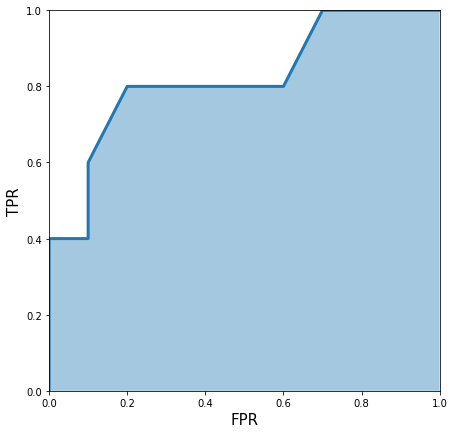

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

This curve is also known as the **Receiver Operating Characteristic (ROC)**. And
if we calculate the area under this ROC curve, we are calculating another metric
which is used very often when you have a dataset which has skewed binary targets.

This metric is known as the **Area Under ROC Curve** or **Area Under Curve** or
just simply **AUC**. There are many ways to calculate the area under the ROC curve.
For this particular purpose, we will stick to the fantastic implementation by scikitlearn.

In [22]:
from sklearn import metrics
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
                  0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
                  0.85, 0.15, 0.99]

metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

**AUC values range from 0 to 1.**

- **AUC = 1** implies you have a perfect model. Most of the time, it means that
you made some mistake with validation and should revisit data processing
and validation pipeline of yours. If you didn’t make any mistakes, then
congratulations, you have the best model one can have for the dataset you
built it on.

- **AUC = 0** implies that your model is very bad (or very good!). Try inverting
the probabilities for the predictions, for example, if your probability for the
positive class is p, try substituting it with 1-p. This kind of AUC may also
mean that there is some problem with your validation or data processing.

- **AUC** = 0.5 implies that your predictions are random. So, for any binary
classification problem, if I predict all targets as 0.5, I will get an AUC of 0.5.

![ROC_AUC](images/ROC_AUC.png)

AUC values between 0 and 0.5 imply that your model is worse than random. Most
of the time, it’s because you inverted the classes. If you try to invert your
predictions, your AUC might become more than 0.5. AUC values closer to 1 are
considered good.

And guess what, you can use the ROC curve to choose this threshold! The ROC
curve will tell you how the threshold impacts false positive rate and true positive
rate and thus, in turn, false positives and true positives. You should choose the
threshold that is best suited for your problem and datasets.

***For example, if you don’t want to have too many false positives, you should have a
high threshold value. This will, however, also give you a lot more false negatives.
Observe the trade-off and select the best threshold.***

In [24]:
# empty lists to store true positive
# and false positive values
tp_list = []
fp_list = []
# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1,
0, 0, 1, 0, 1, 0, 0, 1]
# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
0.85, 0.15, 0.99]
# some handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]
# loop over all thresholds
for thresh in thresholds:
# calculate predictions for a given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    # calculate tp
    temp_tp = true_positive(y_true, temp_pred)
    # calculate fp
    temp_fp = false_positive(y_true, temp_pred)
    # append tp and fp to lists
    tp_list.append(temp_tp)
    fp_list.append(temp_fp)

Most of the time, the top-left value on ROC curve should give you a quite good
threshold

![ROC_AUC](images/best_roc.png)

AUC is a widely used metric for skewed binary classification tasks in the industry,
and a metric everyone should know about. Once you understand the idea behind
AUC, as explained in the paragraphs above, it is also easy to explain it to nontechnical
people who would probably be assessing your models in the industry.

### Log Loss

**Log Loss = - 1.0 * ( target * log(prediction) + (1 - target) * log(1 - prediction) )**

For multiple samples in the dataset, the log-loss over all samples is a mere average
of all individual log losses. One thing to remember is that log loss penalizes quite
high for an incorrect or a far-off prediction, i.e. log loss punishes you for being very
sure and very wrong.

In [26]:
import numpy as np
def log_loss(y_true, y_proba):
    """
    Function to calculate log loss
    :param y_true: list of true values
    :param y_proba: list of probabilities for 1
    :return: overall log loss
    """
    # define an epsilon value
    # this can also be an input
    # this value is used to clip probabilities
    epsilon = 1e-15
    # initialize empty list to store
    # individual losses
    loss = []
    # loop over all true and predicted probability values
    for yt, yp in zip(y_true, y_proba):
        # adjust probability
        # 0 gets converted to 1e-15
        # 1 gets converted to 1-1e-15
        # Why? Think about it!
        yp = np.clip(yp, epsilon, 1 - epsilon)
        # calculate loss for one sample
        temp_loss = - 1.0 * (
        yt * np.log(yp)
        + (1 - yt) * np.log(1 - yp)
        )
        # add to loss list
        loss.append(temp_loss)
    # return mean loss over all samples
    return np.mean(loss)

In [27]:
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
0.85, 0.15, 0.99]
log_loss(y_true, y_proba)

0.49882711861432294

In [28]:
from sklearn import metrics
metrics.log_loss(y_true, y_proba)

0.49882711861432294